In [1]:
import sys
import os
# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), "../src"))
# Add it to sys.path
sys.path.append(project_root)

In [2]:
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from mpcc_models import TVDenoising, TVDenoisingCartesian, TVDenoisingSimple
from dataset import get_dataset
from utils import plot_images_row

In [3]:
sz = 20
dataset = get_dataset("cameraman",scale=sz, random_state=100)
true_img, noisy_img = dataset.get_training_data()

In [16]:
den = TVDenoisingCartesian(true_img,noisy_img)
res = den.solve(max_iter=1000,verbose=True)

Iter   Termination_status            Objective      MPCC_compl               t

0                 0  0.00013158804826347278  0.23961973234208003                1.0

1                 0  0.00013132326535552835  0.23459886967366006                0.5

2                 0  0.0001313311513050541   0.23133310939291202               0.25

3                 0  0.00013135487455135183  0.22675586341347637              0.125

4                 0  0.00013121030659331311  0.2095595066993195              0.0625

5                 0  0.00013140252143153735  0.13915886911816688            0.03125

6                -3  0.00013167663130480986  0.0681872430964907            0.015625

7                 0  0.00013138530550107423  0.07128756670181911          0.0171875

8                 0  0.00013202298514267542  0.04794279057611349     0.007734375000000001

9                 0  0.00013377013775199394  0.03104582071025721     0.0034804687500000005

10                 0  0.00013552149043661332  0.015297861240864418    0.0015662109375000003

11                 0  0.00014021986476972877  0.00769976130187915     0.0007047949218750002

12                 0  0.00021728920283356333  0.004054259853887705    0.0003171577148437501

13                 0  0.0004598896187124579   0.0018881118249799266   0.00014272097167968755

14*               -2  0.0011410631469806508   0.000620853011304716    6.42244372558594e-05

In [17]:
print(f"complementarity: {np.linalg.norm((res['alpha']-res['delta'])*res['r'])}")

KeyError: 'delta'

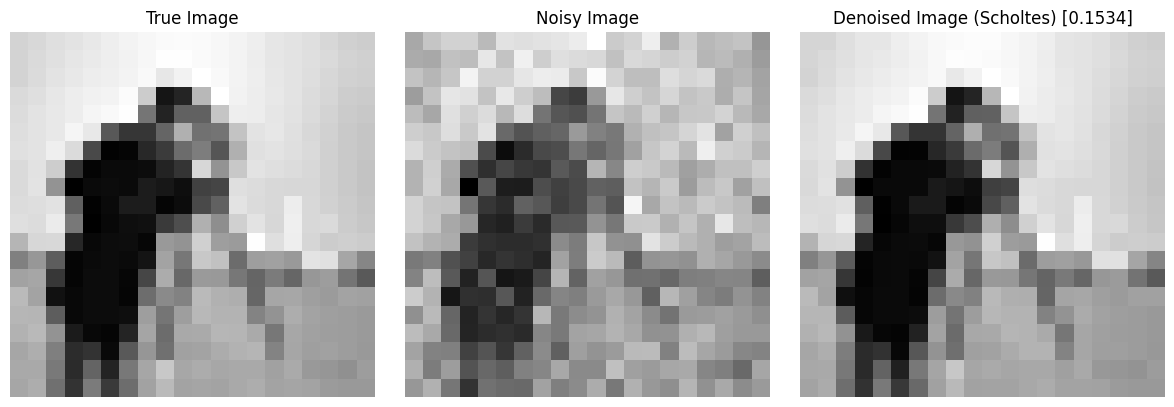

In [18]:
# plot_images_row([true_img, noisy_img, res["u"], res2["u"]], titles=["True Image", "Noisy Image", f"Denoised Image (Scholtes) [{res['alpha'][0]:.2f}]",f"Denoised Image (Fisher) [{res2['alpha'][0]:.2f}]"])
plot_images_row([true_img, noisy_img, res["u"]], titles=["True Image", "Noisy Image",f"Denoised Image (Scholtes) [{res['alpha'][0]:.4f}]"])

In [19]:
print(f"PSNR noisy: {psnr(true_img, noisy_img):.2f}")
# print(f"PSNR (Scholtes): {psnr(true_img, res['u']):.2f}")
print(f"PSNR (Fisher): {psnr(true_img, res['u']):.2f}")

PSNR noisy: 20.11
PSNR (Fisher): 52.91
